## Current Customer Analysis

I have been given two sets data, a training dataset of current existing customers and potential customers for targeted advert. The advert will be targeted at the most influential customers in the potential customer data who will be converted to customers so as to increase the company's sales and revenue in great amount. The features consists of relevant and irrelevant data

In [1]:
#importing the required packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sns.set_style('darkgrid')
pd.options.display.max_columns=99

In [2]:
#The datasets comprises of different data sets such as transaction, new customer, customer address and demographic data 
trans = pd.read_excel(r'C:\Users\Chuks\datasets\kpmg_transaction_data.xlsx', parse_dates=["product_first_sold_date"])
addr = pd.read_excel(r'C:\Users\Chuks\datasets\kpmg_customer_address.xlsx')
demo = pd.read_excel(r'C:\Users\Chuks\datasets\kpmg_customer_demography.xlsx')

In [3]:
print('trans shape is {}'.format(trans.shape))
print('addr shape is {}'.format(addr.shape))
print('demo shape is {}'.format(demo.shape))

trans shape is (20000, 13)
addr shape is (3999, 6)
demo shape is (4000, 13)


In [4]:
# Merging transactional, address and demographic data into dataaset of all customer
pd_merged = pd.merge(trans, demo, on='customer_id')
comb_df = pd.merge(pd_merged, addr, on='customer_id')
#trans.join(demo, on=customer_id)

In [5]:
#peeking at the head and tail of the data.
comb_df.head(3).append(comb_df.tail(3))

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
19965,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0,724 West Park,2112,NSW,Australia,11
19966,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,NaN,No,14.0,8 Becker Drive,4868,QLD,Australia,4
19967,18165,86,3446,2017-12-03,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38206.0,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,NaN,No,14.0,8 Becker Drive,4868,QLD,Australia,4


Some columns have irrelevant data e.g default column and the country column ha thesame value from to bottom. These wil be dropped

In [6]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [7]:
comb_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000,19773.000000,19968.000000,19522.000000,19968.000000,19968.000000
mean,9997.846504,45.365986,1740.254307,0.500688,1107.780004,556.091050,38198.741364,48.757412,10.681949,2987.623347,7.516376
std,5773.929973,30.750115,1009.819066,0.500012,582.852548,405.966472,2874.856871,28.611359,5.674631,851.306647,2.824783
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,0.000000,1.000000,2000.000000,1.000000
25%,4997.750000,18.000000,861.750000,0.000000,575.270000,215.140000,35667.000000,24.000000,6.000000,2200.000000,6.000000
50%,9996.500000,44.000000,1739.500000,1.000000,1163.890000,507.580000,38216.000000,48.000000,11.000000,2767.000000,8.000000
75%,14996.250000,72.000000,2614.250000,1.000000,1635.300000,795.100000,40672.000000,73.000000,15.000000,3754.000000,10.000000
max,20000.000000,100.000000,3500.000000,1.000000,2091.470000,1759.850000,42710.000000,99.000000,22.000000,4883.000000,12.000000


After the combination of the 3 datasets we can see that there are number of missing value in the dataset. The columns have varying count

In [8]:
comb_df.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
default                         

There are a lot of missing values in this dataset that requires cleaning 

In [9]:
comb_df.rename(columns={'past_3_years_bike_related_purchases':'3yrs_purchases', 'DOB':'dob'}, inplace=True)

In [10]:
comb_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       '3yrs_purchases', 'dob', 'job_title', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'default', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [11]:
#dropping some of the featurs that are considered irrelevant for the analysis
comb_df.drop(['transaction_id', 'product_id', 'customer_id', 'postcode', 'first_name', 'last_name', 'deceased_indicator', 
              'default', 'address', 'country'], 'columns', inplace=True)

In [12]:
comb_df.head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,3yrs_purchases,dob,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
2,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,5
4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,5


In [11]:
comb_df['order_status'].value_counts()

Approved     19790
Cancelled      178
Name: order_status, dtype: int64

In [12]:
#comb_df{'order_status':{'Approved':1, 'Cancelled':0}}

In [13]:
order_replace = {"order_status" : {"Approved": 1, "Cancelled": 0,}}
comb_df = comb_df.replace(order_replace)
comb_df.order_status.unique()

array([1, 0], dtype=int64)

In [14]:
comb_df['gender'].unique()

array(['Male', 'Female', 'U', 'F', 'M', 'Femal'], dtype=object)

In [15]:
comb_df['gender'] = comb_df['gender'].replace('F', 'Female')
comb_df['gender'] = comb_df['gender'].replace('M', 'Male')
comb_df['gender'] = comb_df['gender'].replace('Femal', 'Female')
comb_df['gender'] = comb_df['gender'].replace('U', 'NaN')

In [16]:
#comb_df['gender'] = np.where(comb_df.gender == 'Male', 1, 0 )
#comb_df['owns_car'] = np.where(comb_df.owns_car == 'Yes', 1, 0 )

In [17]:
now = pd.Timestamp('now')
comb_df['age'] =(now.year - comb_df['dob'].dt.year) - ((now.month - comb_df['dob'].dt.month) < 0)

In [18]:
comb_df['age'].dtype

dtype('float64')

In [19]:
comb_df['age'].unique()

array([ 65.,  41.,  43.,  58.,  23.,  61.,  42.,  34.,  50.,  38.,  67.,
        39.,  37.,  45.,  nan,  55.,  63.,  47.,  31.,  44.,  49.,  53.,
        59.,  27.,  35.,  51.,  40.,  36.,  56.,  66.,  22.,  33.,  26.,
        54.,  52.,  62.,  32.,  57.,  20.,  46.,  25.,  28.,  48.,  64.,
        60.,  29.,  24.,  30.,  21.,  18.,  89.,  19., 176.,  80.,  77.,
        76.,  85.])

In [20]:
#comb_df[comb_df['age'] == 'nan']

In [21]:
comb_df['age'] = np.array(comb_df['age']).astype(int)
comb_df['tenure'] = np.array(comb_df['tenure']).astype(int)
comb_df['3yrs_purchases'] = np.array(comb_df['3yrs_purchases']).astype(float)
comb_df['property_valuation'] = np.array(comb_df['property_valuation']).astype(int)

In [22]:
comb_df.age.dtype

dtype('int32')

In [23]:
comb_df['state'].unique()

array(['VIC', 'NSW', 'QLD', 'Victoria', 'New South Wales'], dtype=object)

In [24]:
comb_df['state'] = comb_df['state'].replace('New South Wales', 'NSW')
comb_df['state'] = comb_df['state'].replace('Victoria', 'VIC')

In [25]:
comb_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,3yrs_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,2,2950,2017-02-25,0.0,1,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6,65
1,11065,1,2950,2017-10-16,0.0,1,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6,65
2,18923,62,2950,2017-04-26,0.0,1,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6,65
3,2,3,3120,2017-05-21,1.0,1,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10,4 Shopko Circle,2196,NSW,Australia,5,41
4,6862,4,3120,2017-10-05,0.0,1,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10,4 Shopko Circle,2196,NSW,Australia,5,41


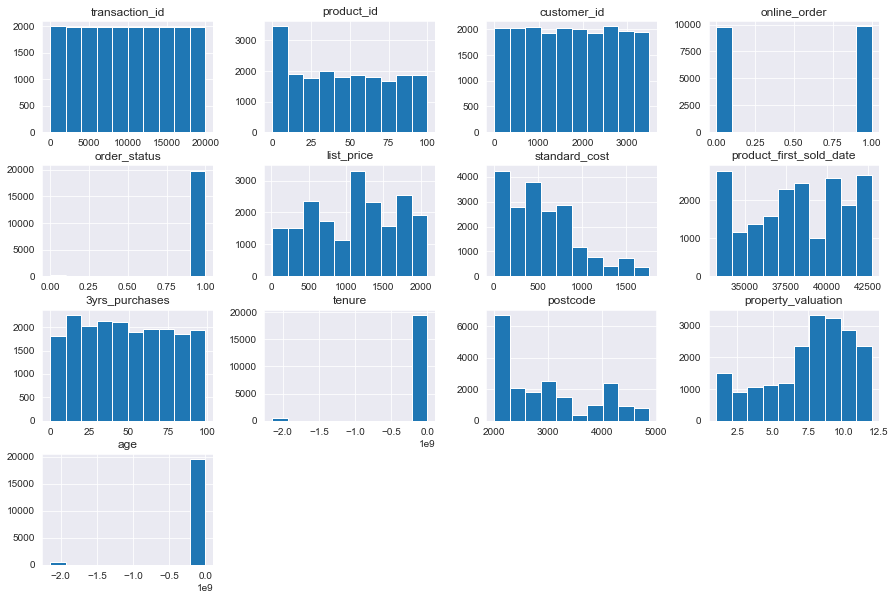

In [26]:
comb_df.hist(figsize=(15,10));

In [27]:
comb_df.drop(comb_df[comb_df['tenure'] == -2147483648].index, inplace=True)
#comb_df.drop(comb_df[comb_df['postcode'] == -2147483648].index, inplace=True)
comb_df.drop(comb_df[comb_df['job_industry_category'] == 'nan'].index, inplace=True)
comb_df.drop(comb_df[comb_df['property_valuation'] == -2147483648].index, inplace=True)
comb_df.drop(comb_df[comb_df['age'] == 176].index, inplace=True)

In [30]:
cut_points = [17,35,60,90]
label_names = ["young adult","adult","senior"]
comb_df["age_categories"] = pd.cut(comb_df["age"],cut_points,labels=label_names)

In [31]:
comb_df['property_valuation'].unique()

array([ 6,  5,  1, 10,  7,  4,  8,  9, 11,  2, 12,  3])

C:\Users\Chuks\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


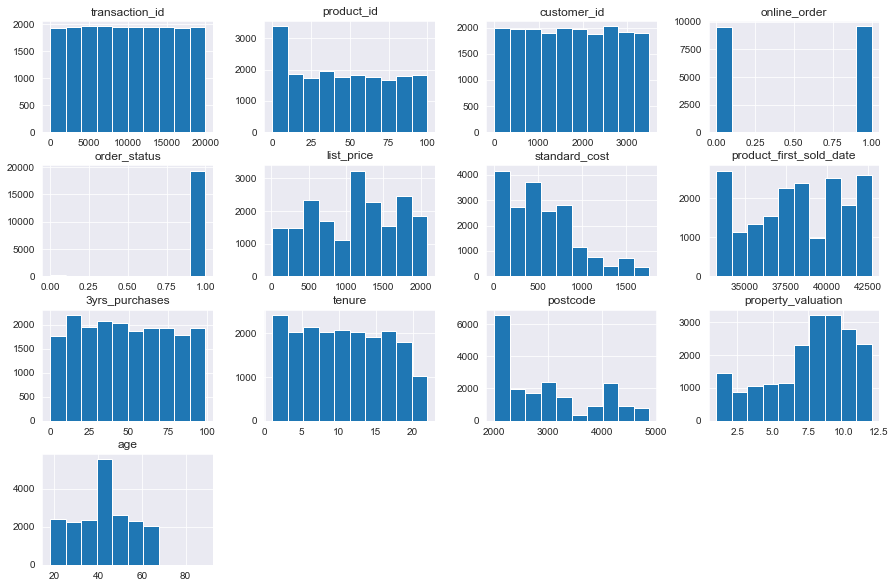

In [32]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
comb_df.hist(ax=ax)
plt.show()